In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
pip install nbconvert[webpdf]


Note: you may need to restart the kernel to use updated packages.


In [3]:
!jupyter serverextension enable --py nbconvert


Traceback (most recent call last):
  File "C:\Users\msn\AppData\Local\anaconda3\Scripts\jupyter-serverextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\notebook\serverextensions.py", line 289, in start
    super().start()
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in start
    self.subapp.start()
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\notebook\serverextensions.py", line 208, in start
    self.toggle_server_extension_python(arg)
  File "C:\Users\msn\AppData\Local\anaconda3\lib\site-packages\notebook\serverextension

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('employee.csv')

# Check the first few rows of the DataFrame
df.head()

# Check the number of unique values for each column with object datatype
df.select_dtypes(include='object').nunique()

# Check the number of unique values for each column with int datatype
df.select_dtypes(include='int').nunique()

# Drop columns: 'EmployeeNumber', 'StandardHours', 'Over18', 'PerformanceRating'
df.drop(columns=['EmployeeNumber', 'StandardHours', 'Over18', 'PerformanceRating'], inplace=True)


In [3]:
df.select_dtypes(include='int')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8


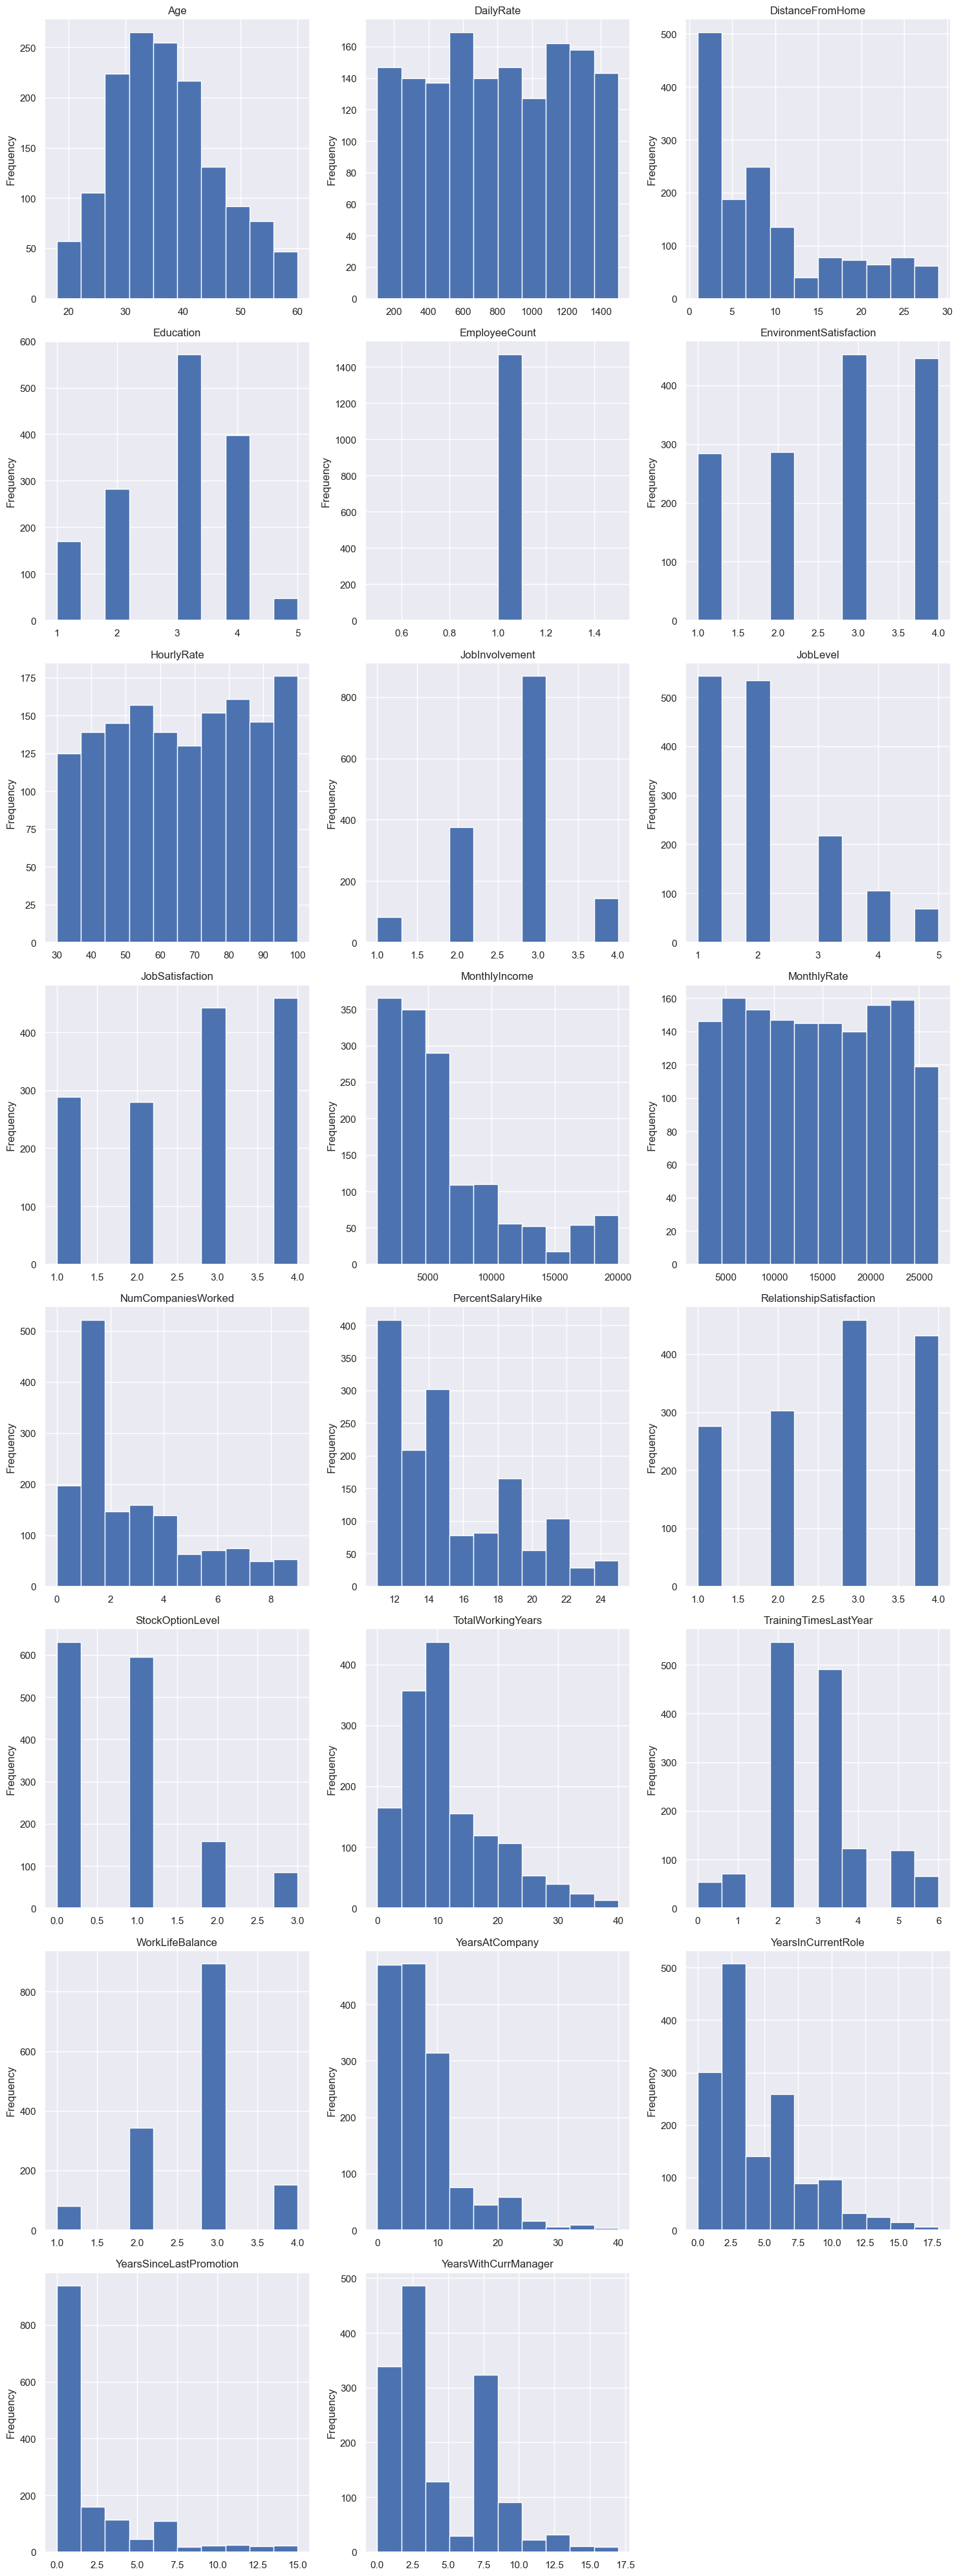

In [4]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

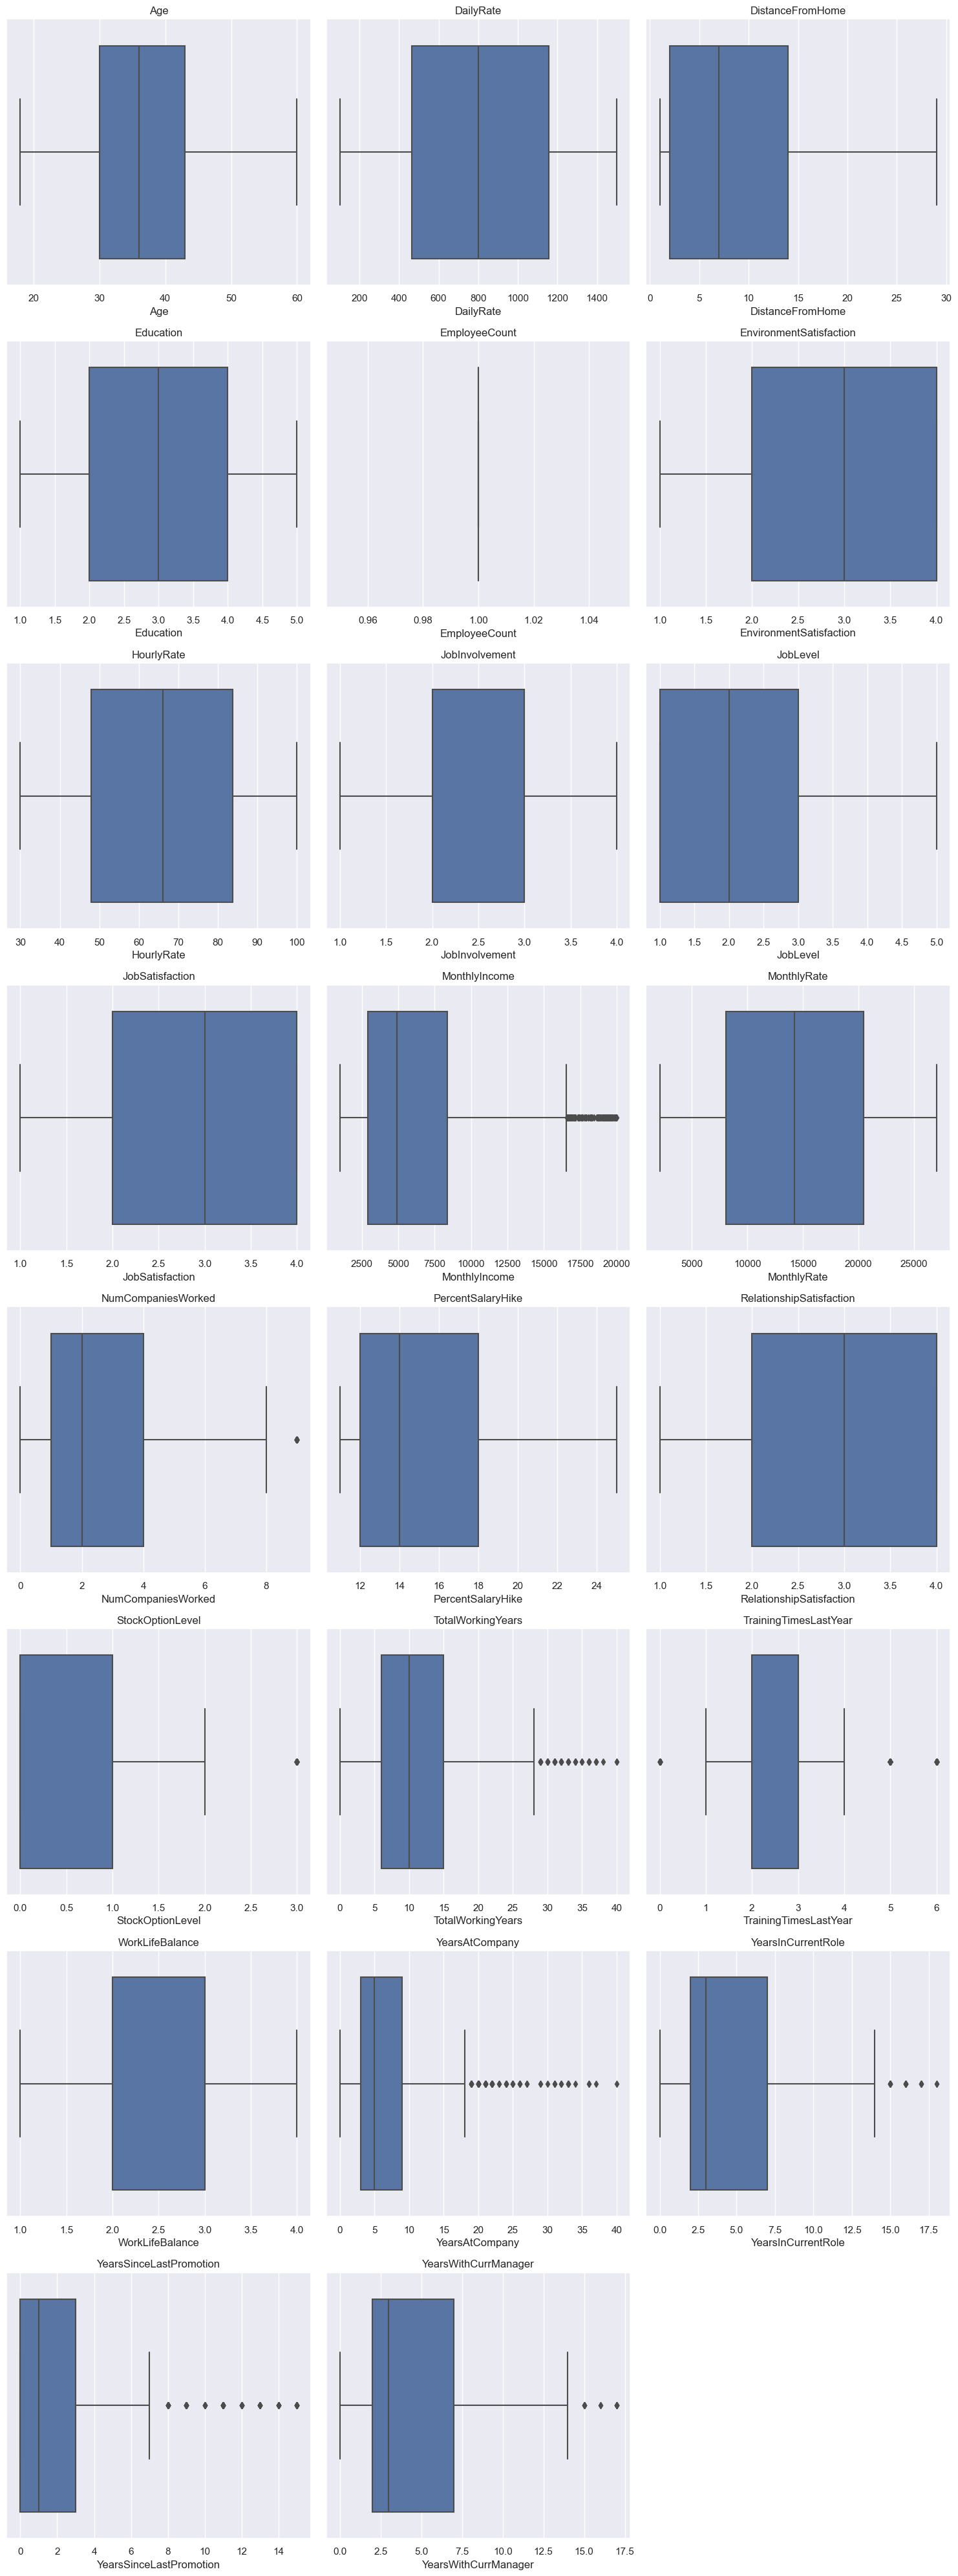

In [5]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [6]:
# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')


mean_values = int_columns.mean()
std_values = int_columns.std()
min_values = int_columns.min()
q1_values = int_columns.quantile(0.25)
q2_values = int_columns.quantile(0.5)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
max_values = int_columns.max()
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Std': std_values,
    'Min': min_values,
    'Q1': q1_values,
    'Q2 (Median)': q2_values,
    'Q3': q3_values,
    'IQR': iqr_values,
    'Max': max_values
})

statistics_df

,Mean,Std,Min,Q1,Q2 (Median),Q3,IQR,Max
Age,36.923810,9.135373e+00,18,30.0,36.0,43.00,13.00,60
DailyRate,802.485714,4.035091e+02,102,465.0,802.0,1157.00,692.00,1499
DistanceFromHome,9.192517,8.106864e+00,1,2.0,7.0,14.00,12.00,29
Education,2.912925,1.024165e+00,1,2.0,3.0,4.00,2.00,5
EmployeeCount,1.000000,1.110601e-16,1,1.0,1.0,1.00,0.00,1
EnvironmentSatisfaction,2.721769,1.093082e+00,1,2.0,3.0,4.00,2.00,4
HourlyRate,65.891156,2.032943e+01,30,48.0,66.0,83.75,35.75,100
JobInvolvement,2.729932,7.115611e-01,1,2.0,3.0,3.00,1.00,4
JobLevel,2.063946,1.106940e+00,1,1.0,2.0,3.00,2.00,5
JobSatisfaction,2.728571,1.102846e+00,1,2.0,3.0,4.00,2.00,4


In [7]:
# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')
q1_values = int_columns.quantile(0.25)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
upper_whisker_values = q3_values + 1.5 * iqr_values
lower_whisker_values = q1_values - 1.5 * iqr_values

whisker_df = pd.DataFrame({
    'Upper Whisker': upper_whisker_values,
    'Lower Whisker': lower_whisker_values
})

whisker_df

,Upper Whisker,Lower Whisker
Age,62.500,10.500
DailyRate,2195.000,-573.000
DistanceFromHome,32.000,-16.000
Education,7.000,-1.000
EmployeeCount,1.000,1.000
EnvironmentSatisfaction,7.000,-1.000
HourlyRate,137.375,-5.625
JobInvolvement,4.500,0.500
JobLevel,6.000,-2.000
JobSatisfaction,7.000,-1.000


In [8]:
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the data

# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')

q1_values = int_columns.quantile(0.25)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
upper_whisker_values = q3_values + 1.5 * iqr_values
lower_whisker_values = q1_values - 1.5 * iqr_values

outlier_count = ((int_columns < lower_whisker_values) | (int_columns > upper_whisker_values)).sum()
total_data_points = len(int_columns)
outlier_proportion = (outlier_count / total_data_points) * 100

outlier_list = {}
for col in int_columns.columns:
    outliers = int_columns[col][(int_columns[col] < lower_whisker_values[col]) | (int_columns[col] > upper_whisker_values[col])].tolist()
    outlier_list[col] = outliers

outlier_df = pd.DataFrame({
    'Outlier Count': outlier_count,
    'Outlier Proportion (%)': outlier_proportion,
    'Outlier List': outlier_list
})

outlier_df


,Outlier Count,Outlier Proportion (%),Outlier List
Age,0,0.000000,[]
DailyRate,0,0.000000,[]
DistanceFromHome,0,0.000000,[]
Education,0,0.000000,[]
EmployeeCount,0,0.000000,[]
EnvironmentSatisfaction,0,0.000000,[]
HourlyRate,0,0.000000,[]
JobInvolvement,0,0.000000,[]
JobLevel,0,0.000000,[]
JobSatisfaction,0,0.000000,[]


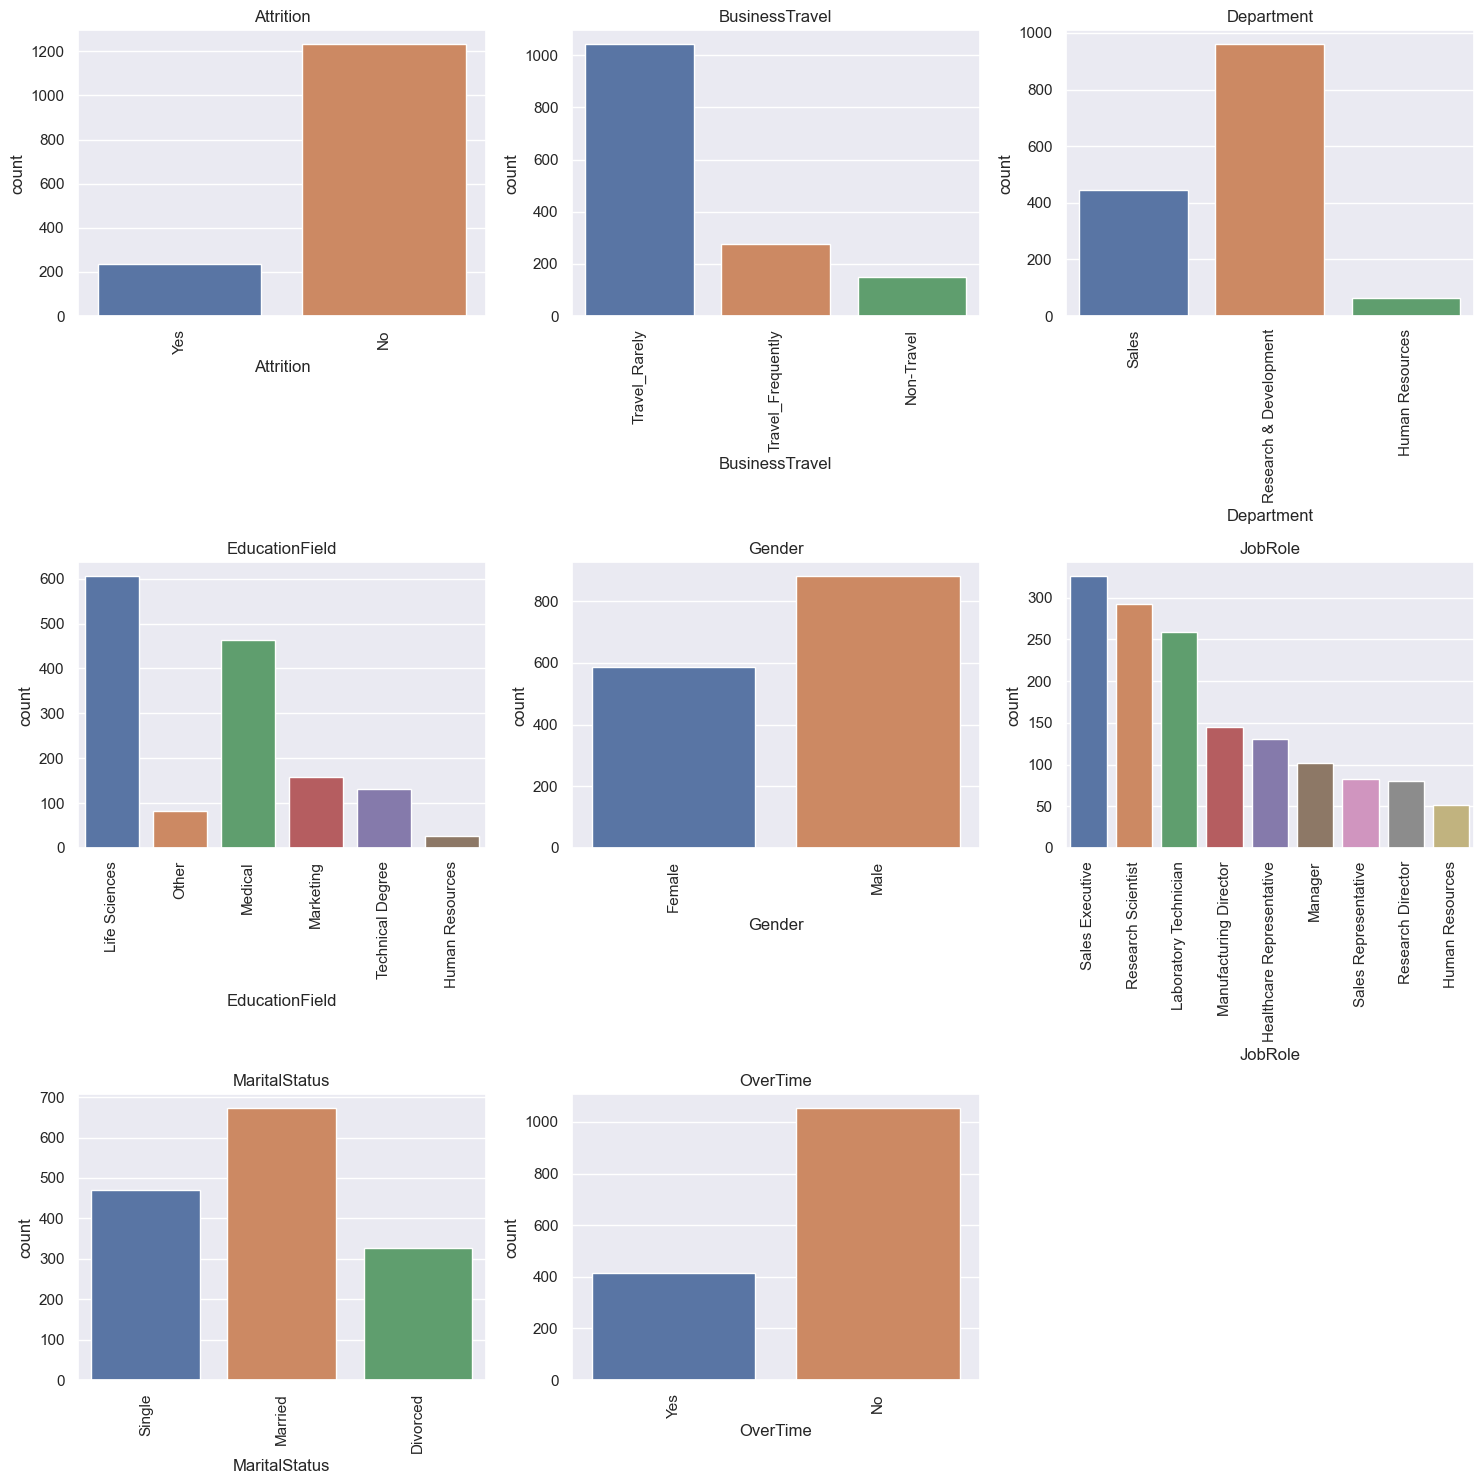

In [9]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [10]:
# Create a dictionary to store unique categories and their frequencies for each column
unique_categories = {}

# Iterate over each column in the DataFrame
for col in df.columns:
    # Check if the column has object data type (categorical column)
    if df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        unique_categories[col] = {
            'Categories': value_counts.index.tolist(),
            'Frequency': value_counts.values.tolist()
        }

# Display the list of unique categories and their frequencies for each column
for col, data in unique_categories.items():
    print(f"Column: {col}")
    print(pd.DataFrame(data))
    print()

Column: Attrition
  Categories  Frequency
0         No       1233
1        Yes        237

Column: BusinessTravel
          Categories  Frequency
0      Travel_Rarely       1043
1  Travel_Frequently        277
2         Non-Travel        150

Column: Department
               Categories  Frequency
0  Research & Development        961
1                   Sales        446
2         Human Resources         63

Column: EducationField
         Categories  Frequency
0     Life Sciences        606
1           Medical        464
2         Marketing        159
3  Technical Degree        132
4             Other         82
5   Human Resources         27

Column: Gender
  Categories  Frequency
0       Male        882
1     Female        588

Column: JobRole
                  Categories  Frequency
0            Sales Executive        326
1         Research Scientist        292
2      Laboratory Technician        259
3     Manufacturing Director        145
4  Healthcare Representative        131
5   

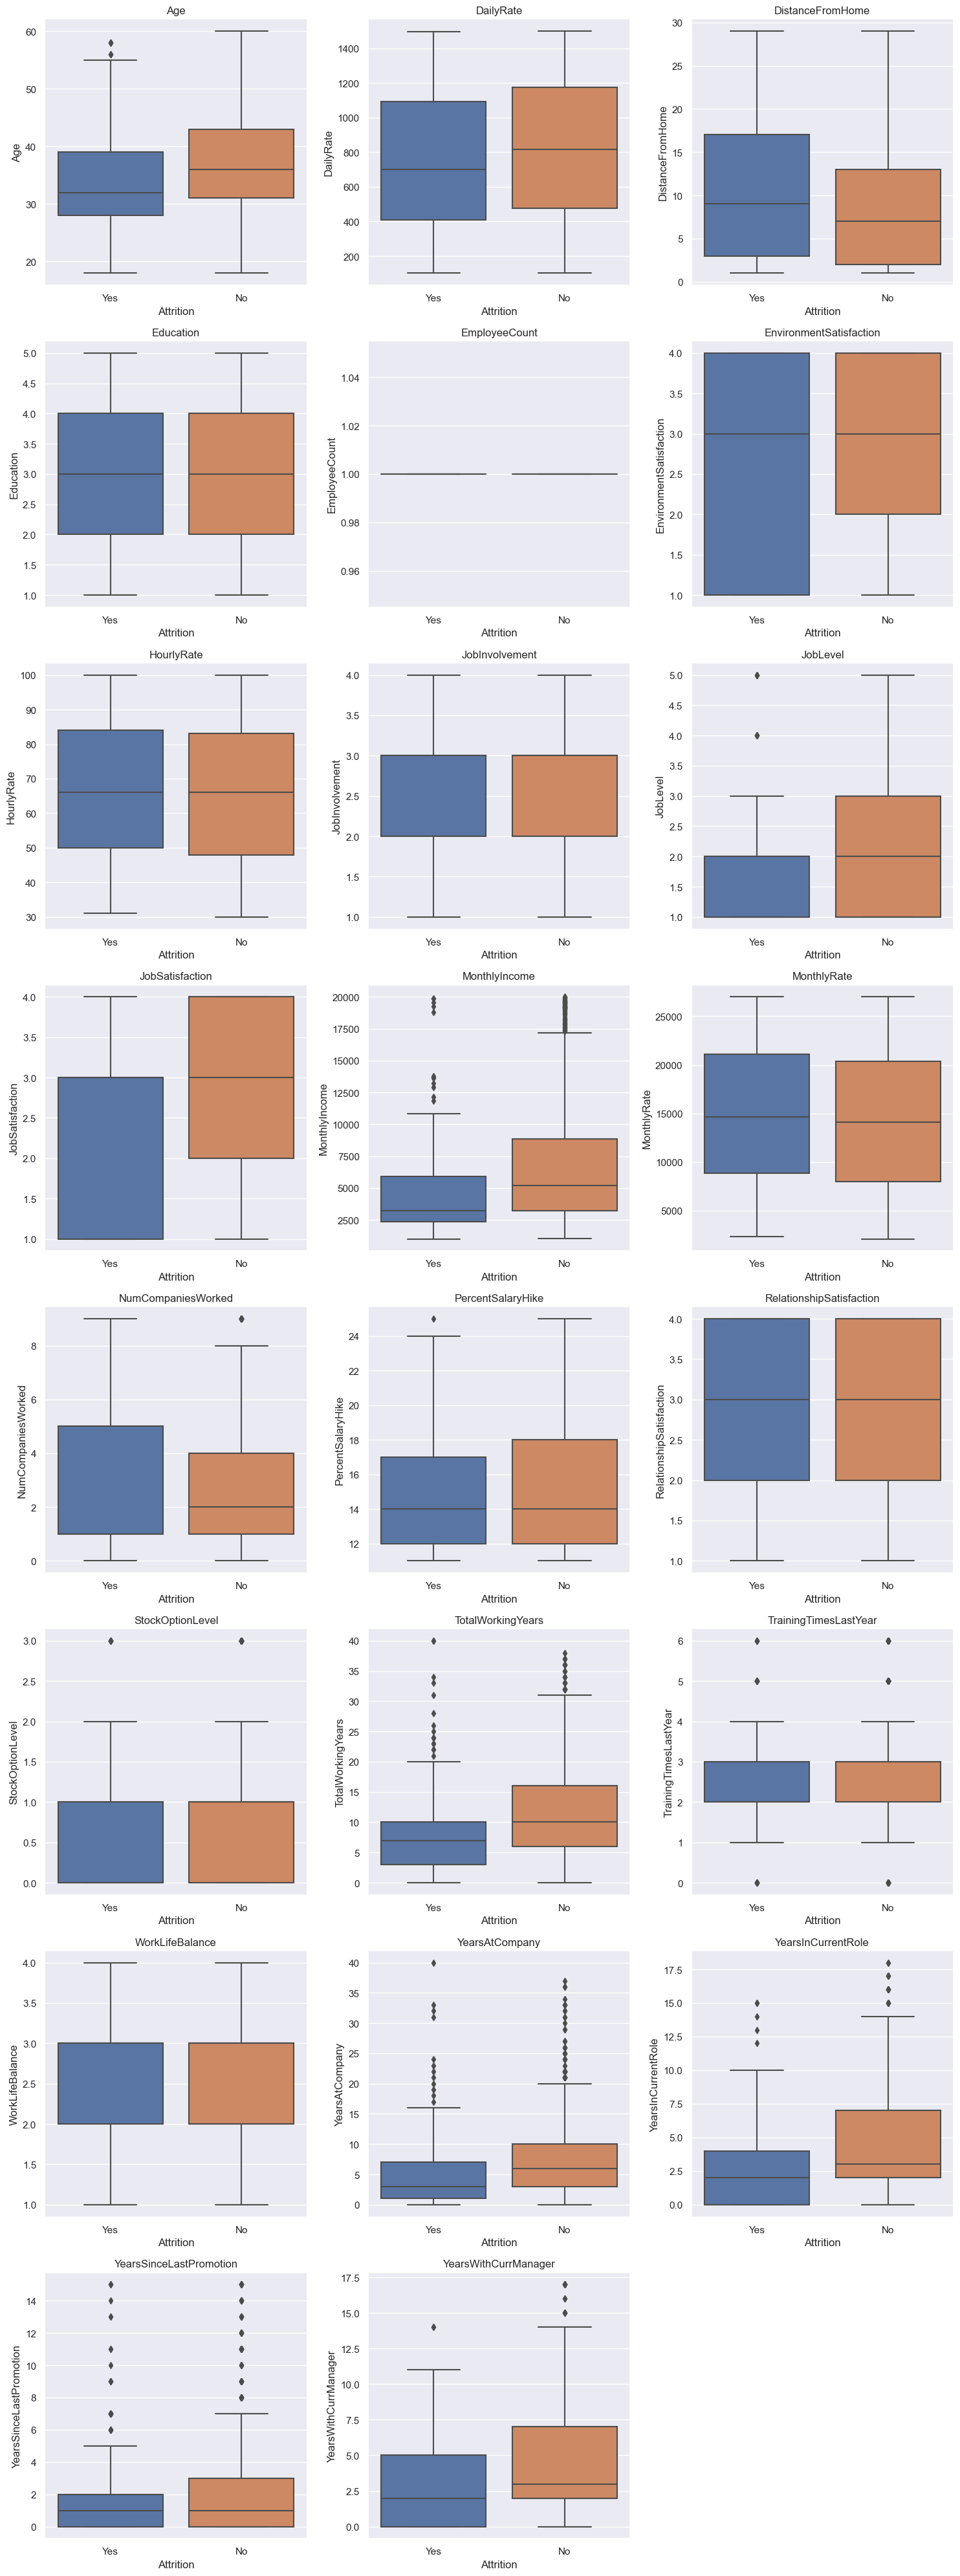

In [11]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Attrition', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

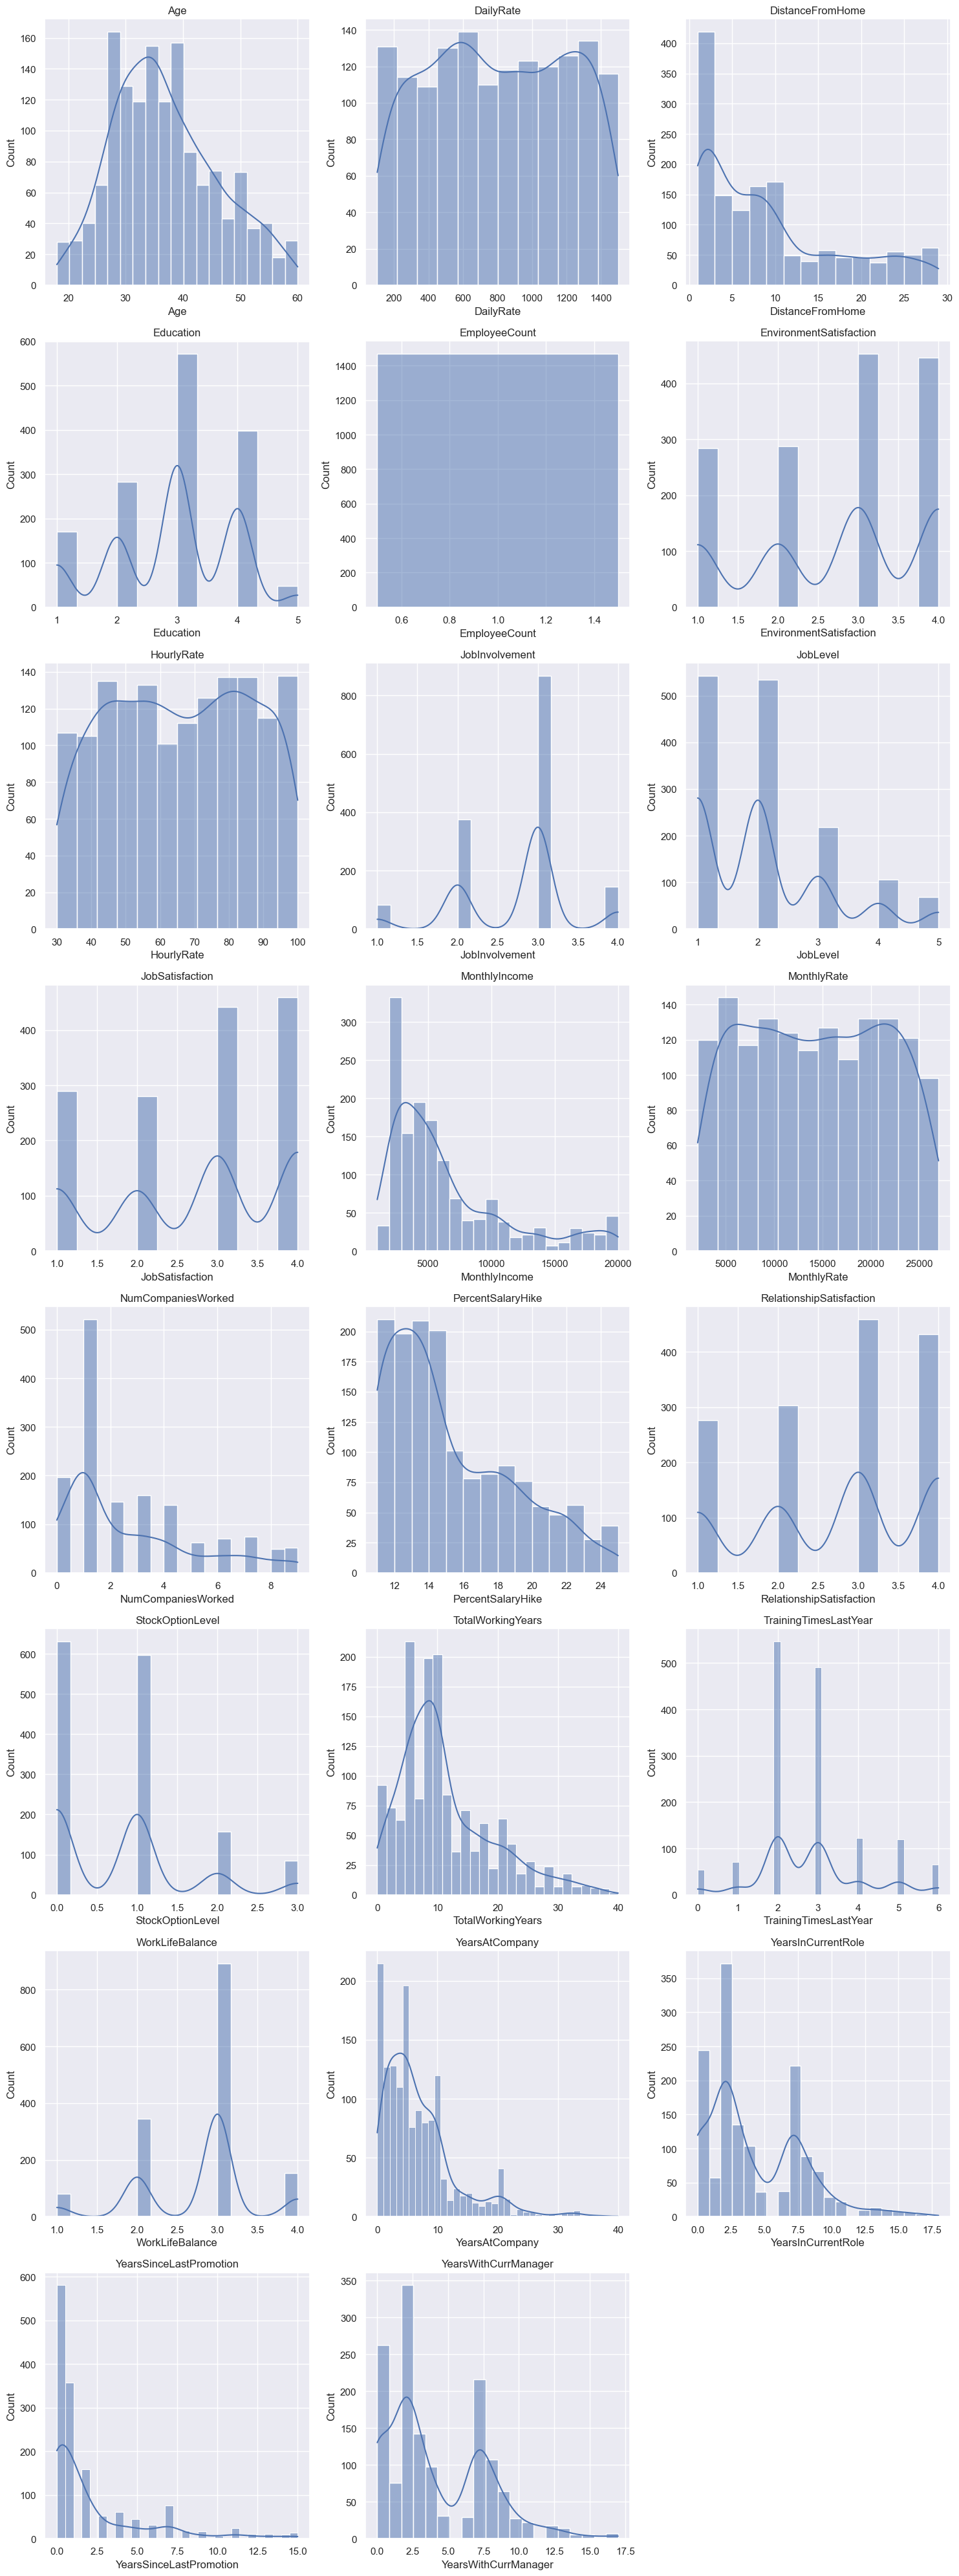

In [14]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


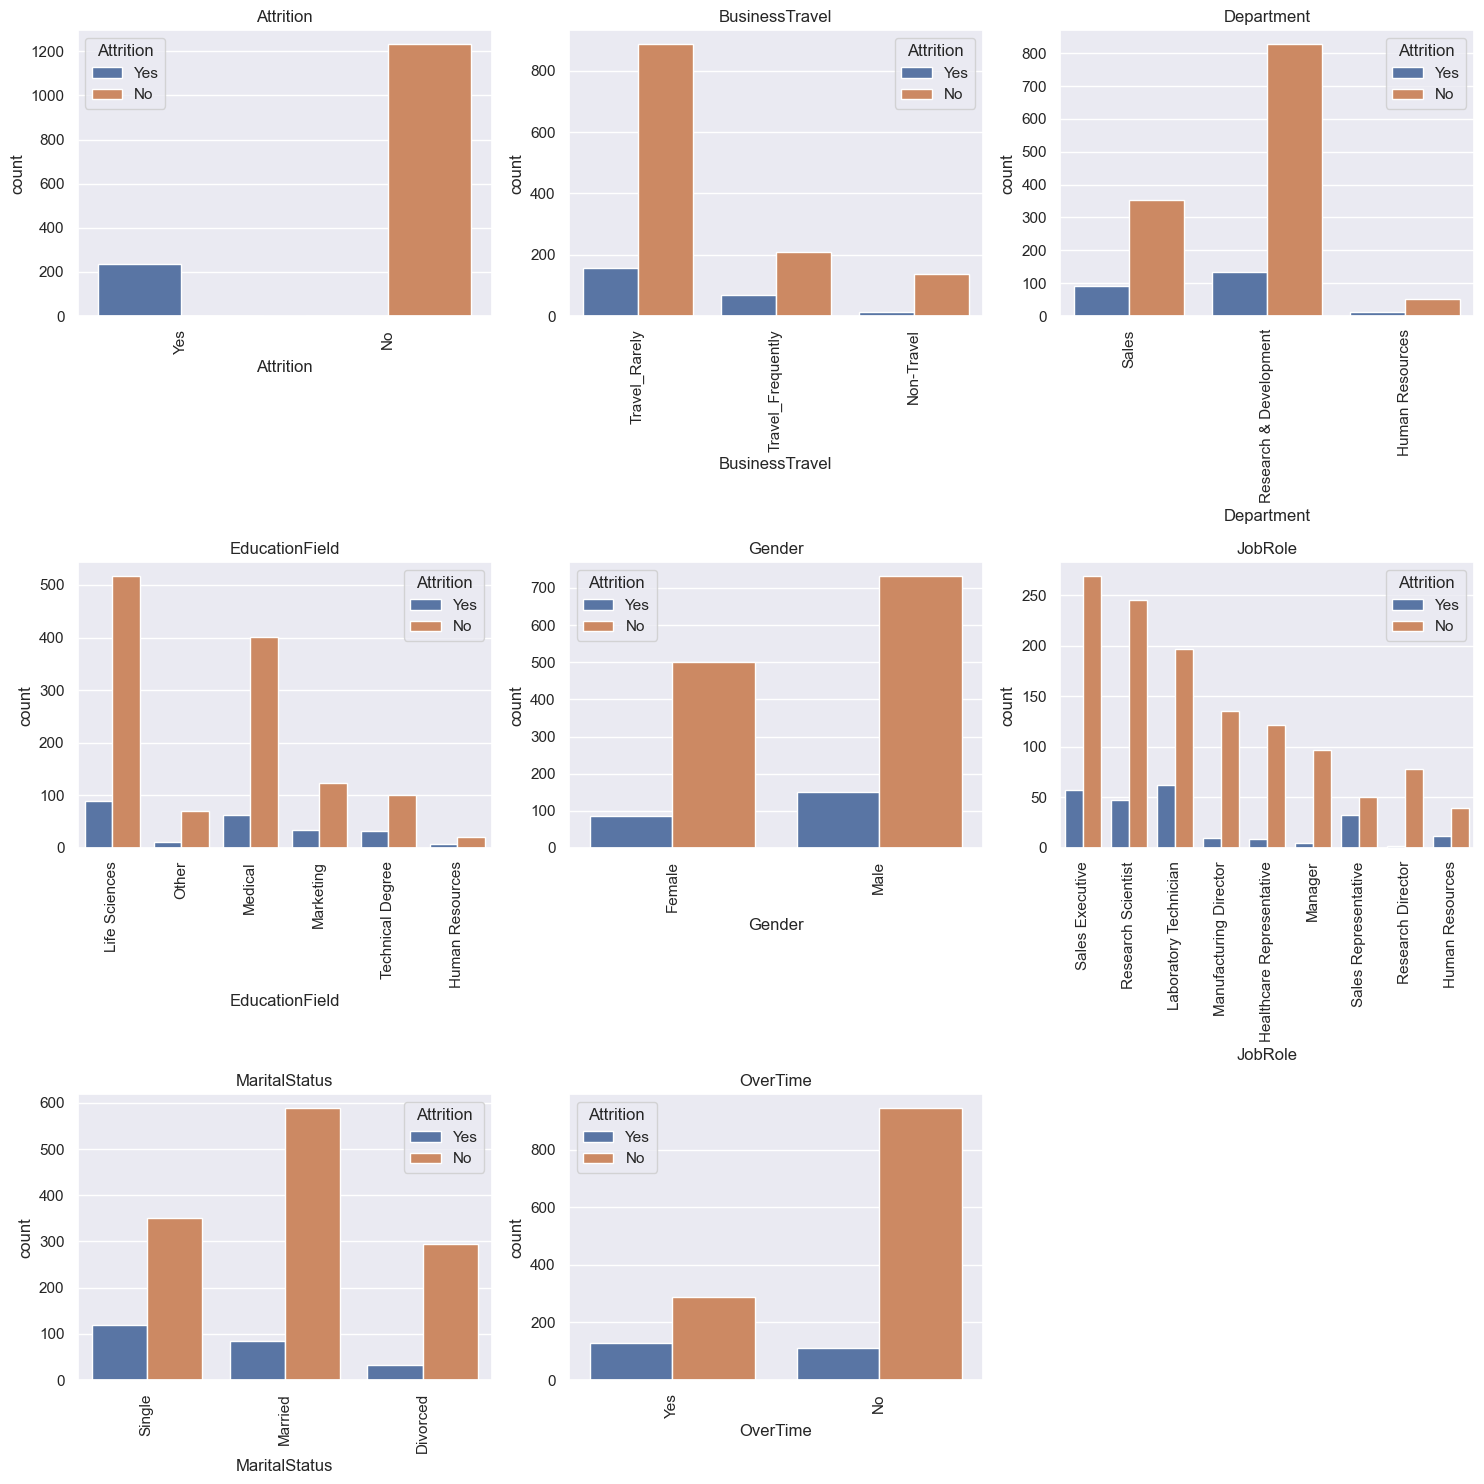

In [15]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'Attrition' as hue
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Attrition', data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


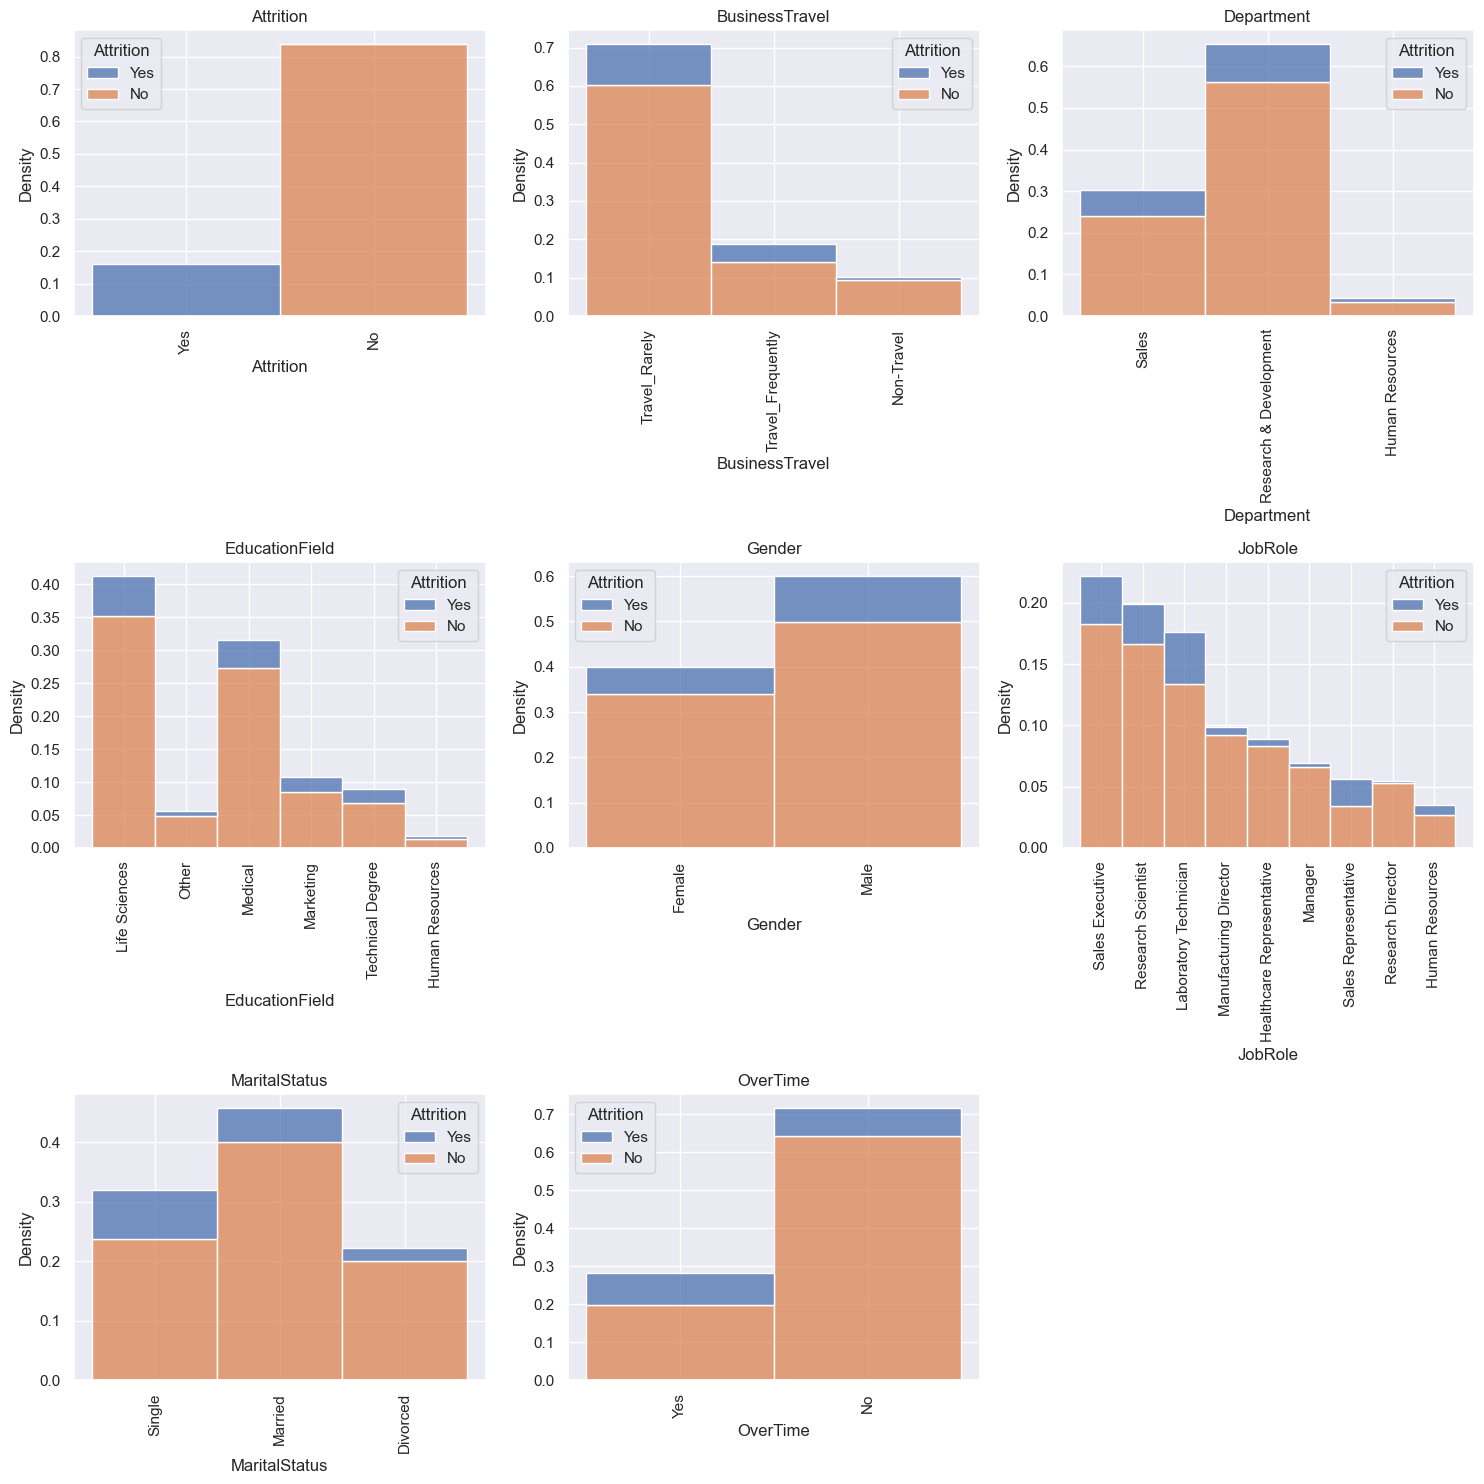

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the data

# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(data=df, x=var, hue='Attrition', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Density')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [17]:
from scipy.stats import ttest_ind

# Extract 'Total Working Years' for employees who left (Attrition = 'Yes') and stayed (Attrition = 'No')
working_years_left = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
working_years_stayed = df[df['Attrition'] == 'No']['TotalWorkingYears']

# Perform the independent t-test
alpha = 0.05
t_statistic, p_value = ttest_ind(working_years_left, working_years_stayed)

# Print the results
print("Independent T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Independent T-Test Results:
T-Statistic: -6.6522546135024445
P-Value: 4.0618781112668525e-11


In [18]:
from scipy.stats import f_oneway

# Extract 'Age' for employees from each department
age_Sales = df[df['Department'] == 'Sales']['Age']
age_Research_Development = df[df['Department'] == 'Research & Development']['Age']
age_Human_Resources = df[df['Department'] == 'Human Resources']['Age']

# Perform the one-way ANOVA
alpha = 0.05
f_statistic, p_value = f_oneway(age_Sales, age_Research_Development, age_Human_Resources)

# Print the results
print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

One-Way ANOVA Results:
F-Statistic: 0.7655031924976903
P-Value: 0.46528552999349515


In [19]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [20]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


In [21]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Attrition: [1 0]
BusinessTravel: [2 1 0]
Department: [2 1 0]
EducationField: [1 4 3 2 5 0]
Gender: [0 1]
JobRole: [7 6 2 4 0 3 8 5 1]
MaritalStatus: [2 1 0]
OverTime: [1 0]


<Axes: >

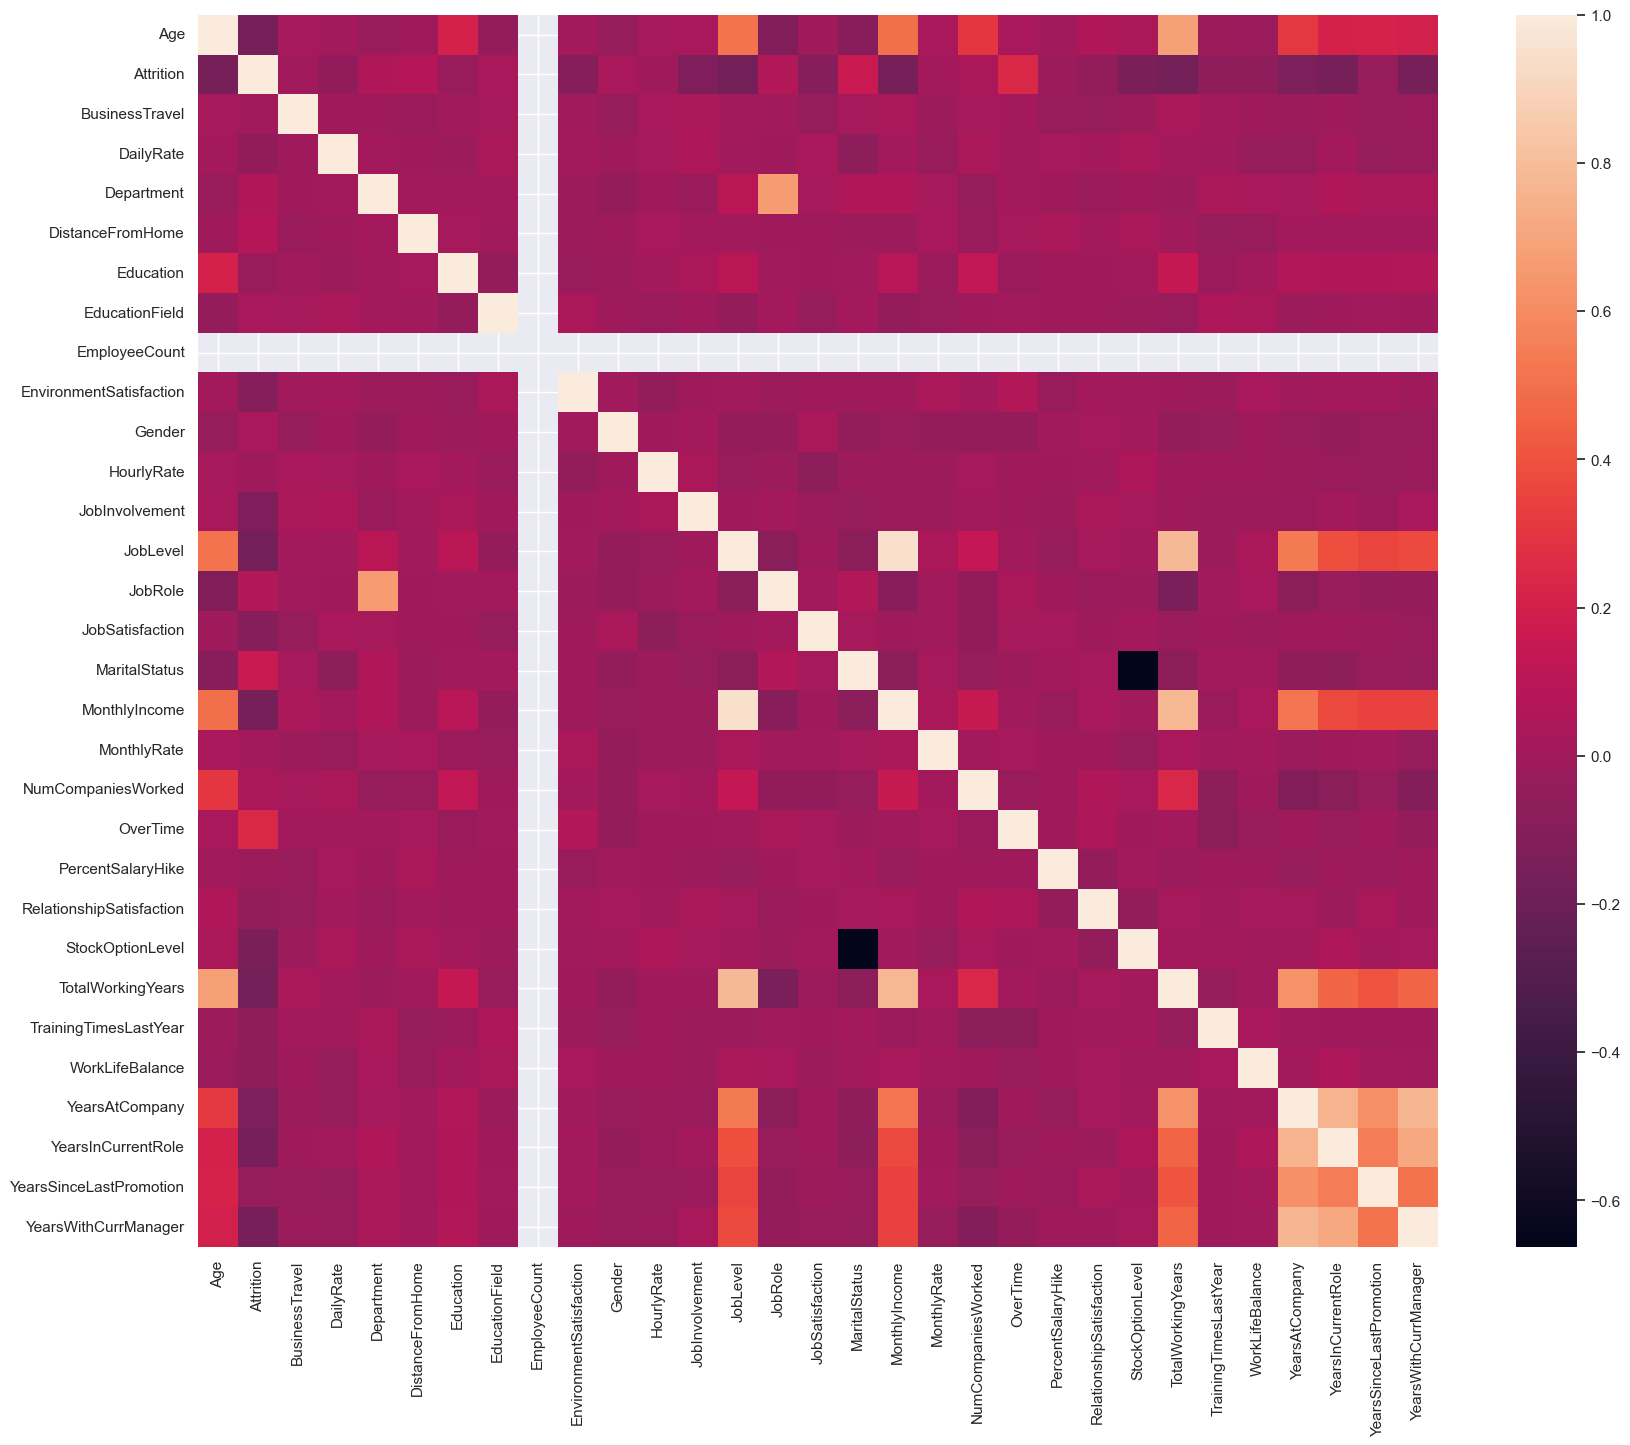

In [22]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g')

In [23]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [25]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [26]:
!pip install xgboost


In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Estimator 1: Logistic Regression
lr_classifier = LogisticRegression(solver='liblinear', random_state=42)
lr_params = {'C': [0.1, 1.0, 10.0]}

# Estimator 2: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [None, 5, 10, 15]}

# Estimator 3: XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Cross-validation untuk Logistic Regression
lr_grid_search = GridSearchCV(lr_classifier, lr_params, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
print("Logistic Regression - Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression - Best Cross-validation Score:", lr_grid_search.best_score_)

# Cross-validation untuk Decision Tree Classifier
dt_grid_search = GridSearchCV(dt_classifier, dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print("Decision Tree Classifier - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Classifier - Best Cross-validation Score:", dt_grid_search.best_score_)

# Cross-validation untuk XGBoost Classifier
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_params, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print("XGBoost Classifier - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Classifier - Best Cross-validation Score:", xgb_grid_search.best_score_)

Logistic Regression - Best Parameters: {'C': 1.0}
Logistic Regression - Best Cross-validation Score: 0.8575072069186419
Decision Tree Classifier - Best Parameters: {'max_depth': 5}
Decision Tree Classifier - Best Cross-validation Score: 0.8207839525944907
XGBoost Classifier - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
XGBoost Classifier - Best Cross-validation Score: 0.871872998078155


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# here performing a grid search with cross-validation to find the best the hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.89 %


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7789115646258504
Precision Score :  0.7789115646258503
Recall Score :  0.7789115646258503
Jaccard Score :  0.637883008356546
Log Loss :  7.968834932968078


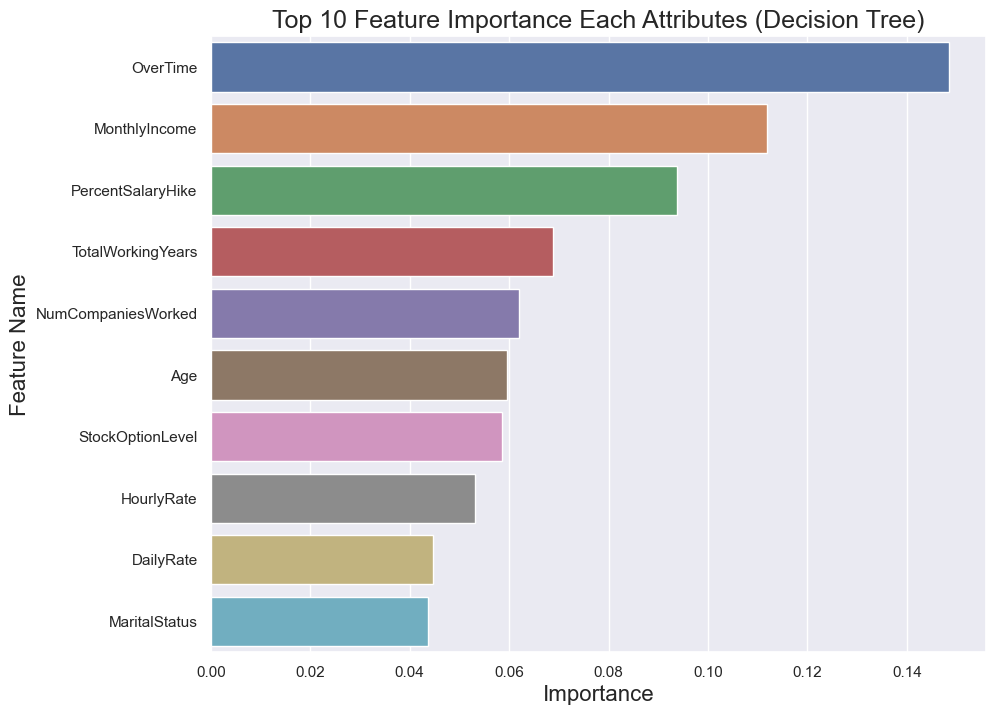

In [32]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [33]:
!pip install shap


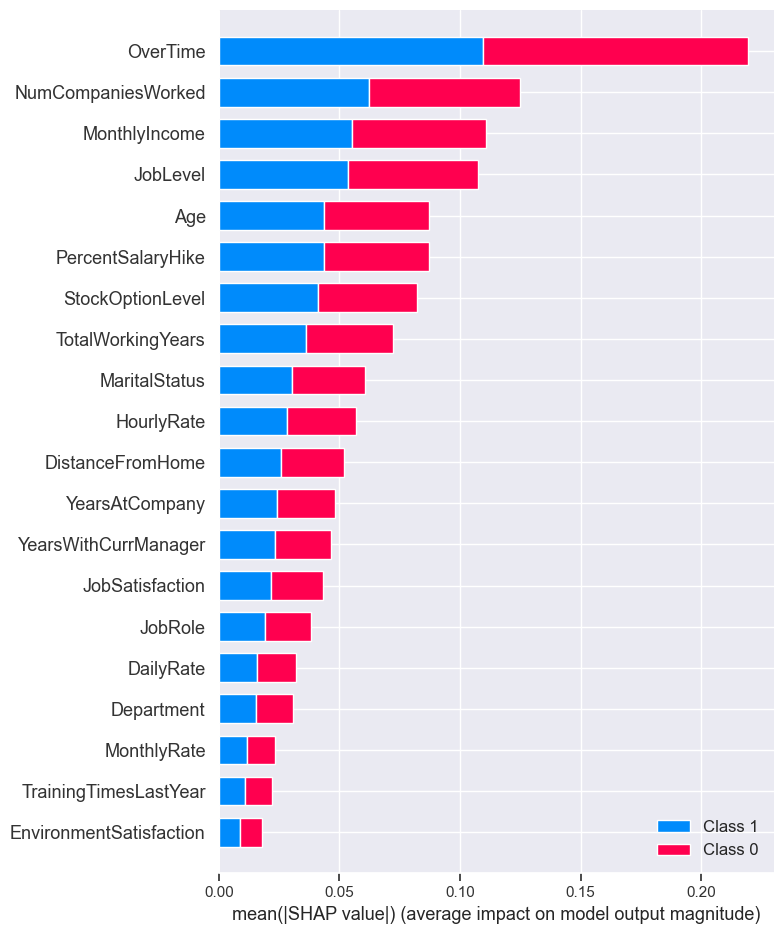

In [34]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


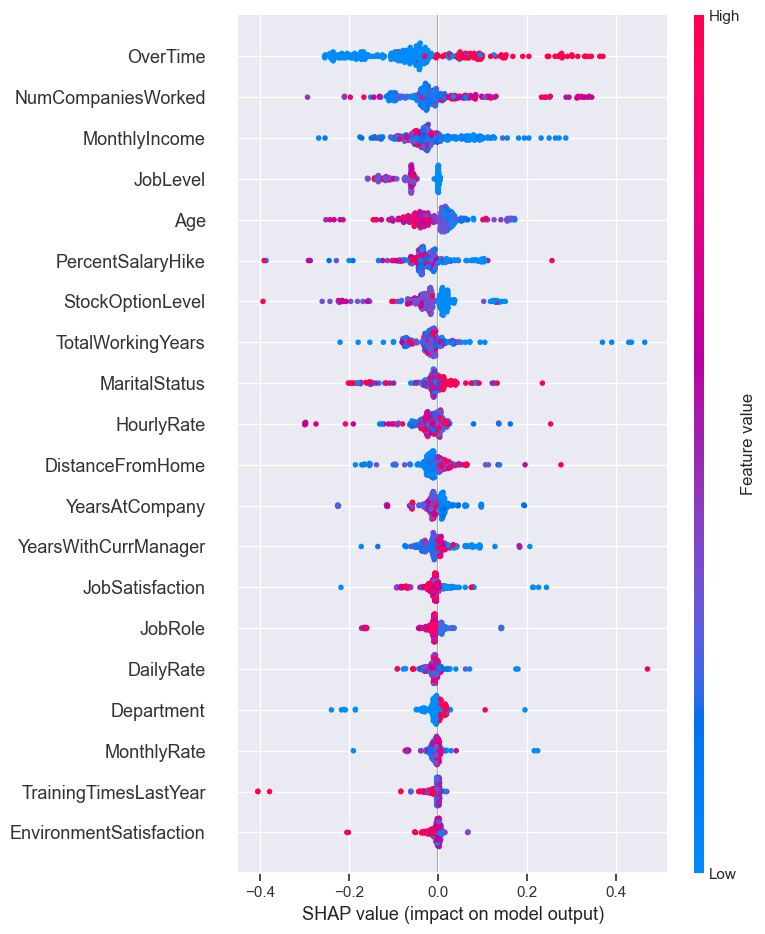

In [35]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7789115646258503')

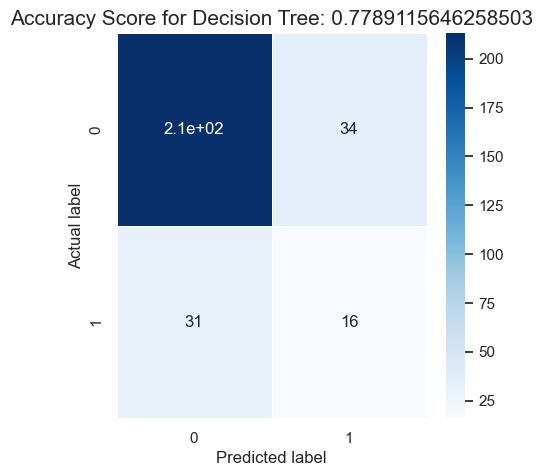

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

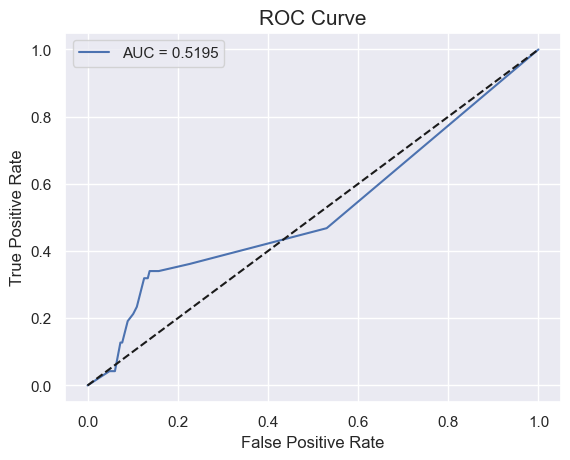

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': None, 'n_estimators': 100, 'random_state': 42}


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.03 %


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F1 Score :  0.8503401360544217
Precision Score :  0.8503401360544217
Recall Score :  0.8503401360544217
Jaccard Score :  0.7396449704142012
Log Loss :  5.394288262316852


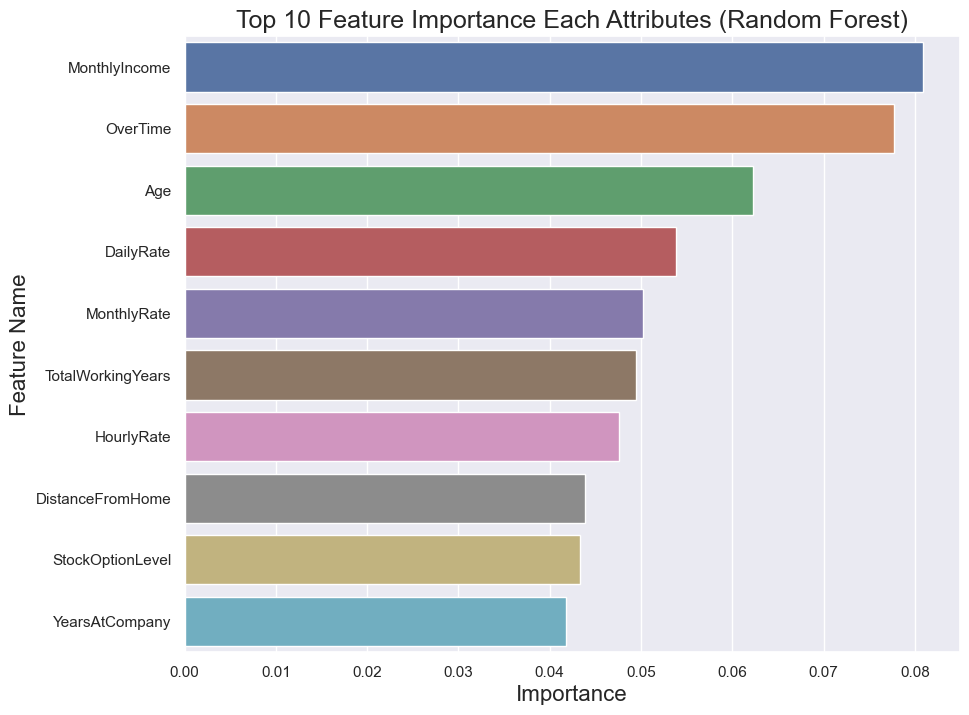

In [43]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

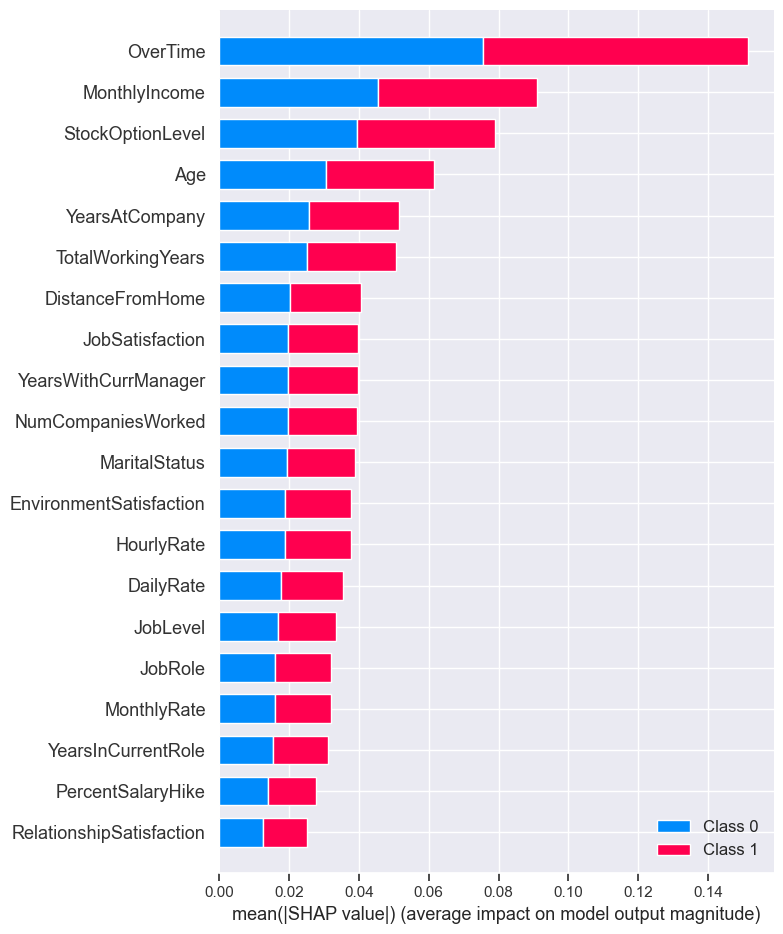

In [44]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


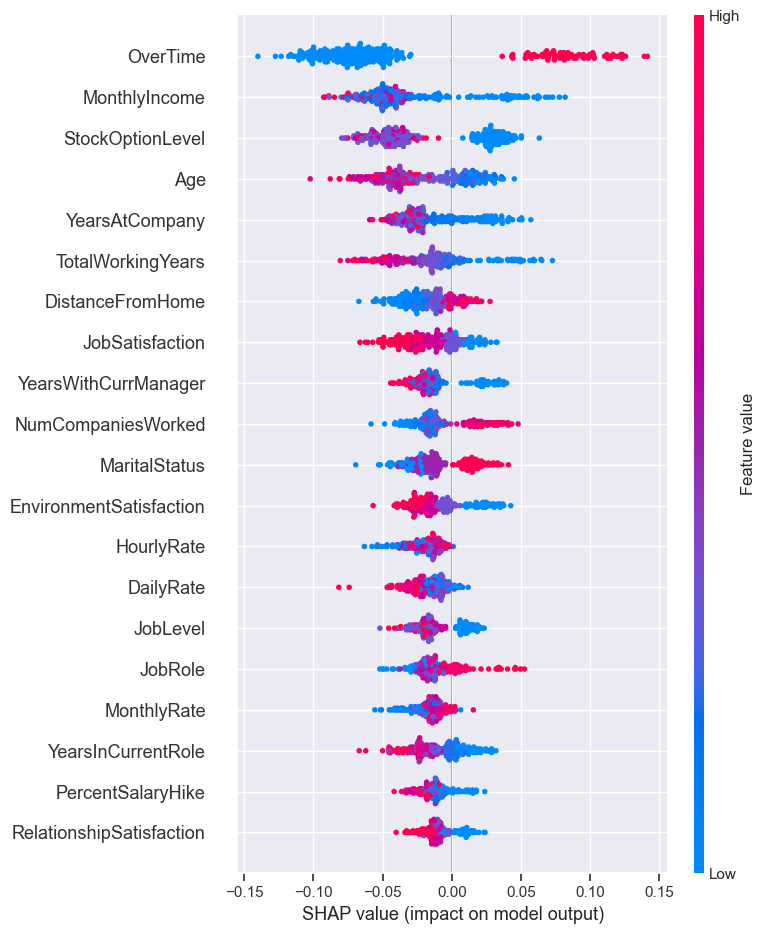

In [45]:

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8503401360544217')

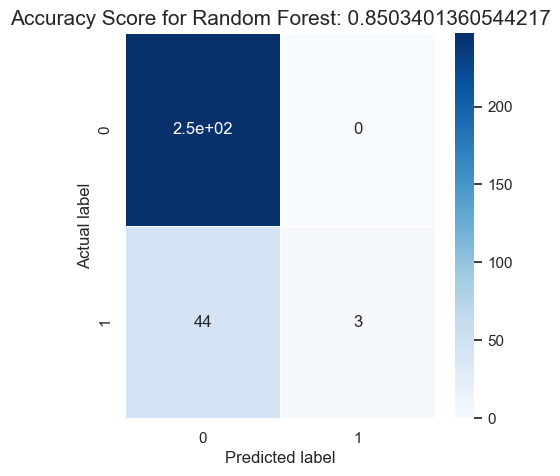

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

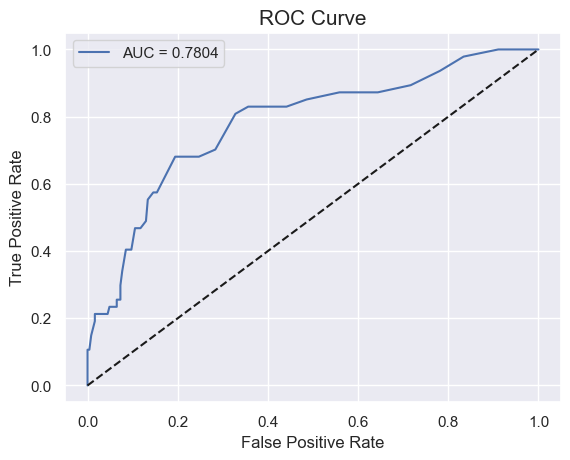

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.39 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8639455782312925
Precision Score :  0.8639455782312925
Recall Score :  0.8639455782312925
Jaccard Score :  0.7604790419161677
Log Loss :  4.903898420288048


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


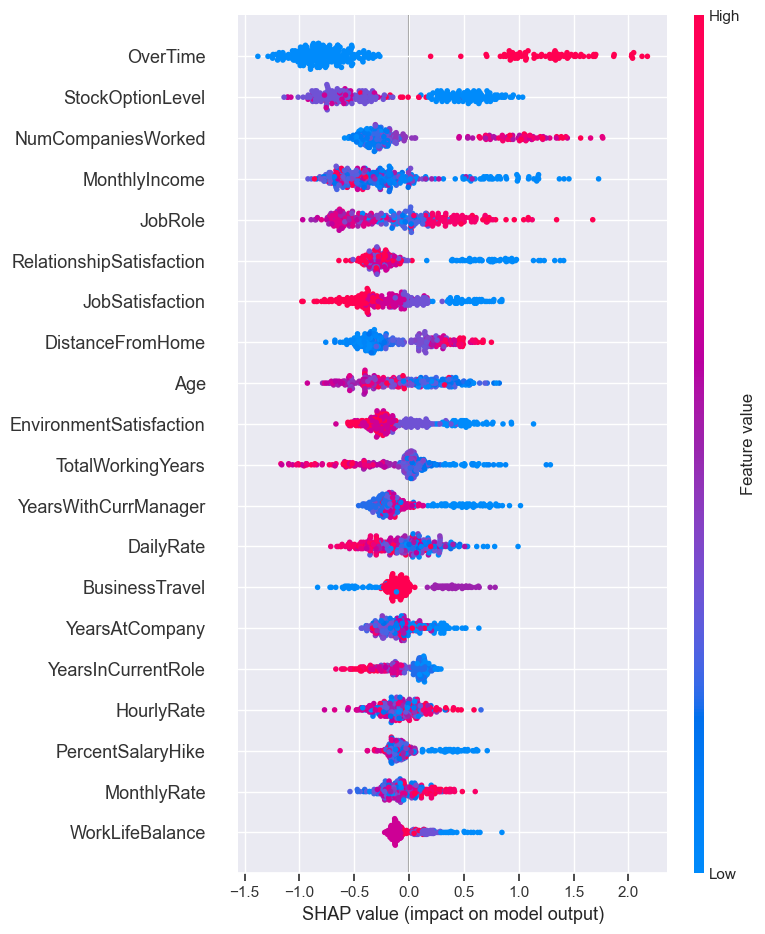

In [52]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.8639455782312925')

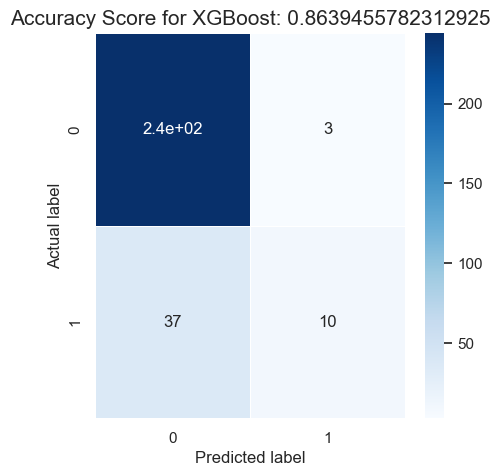

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

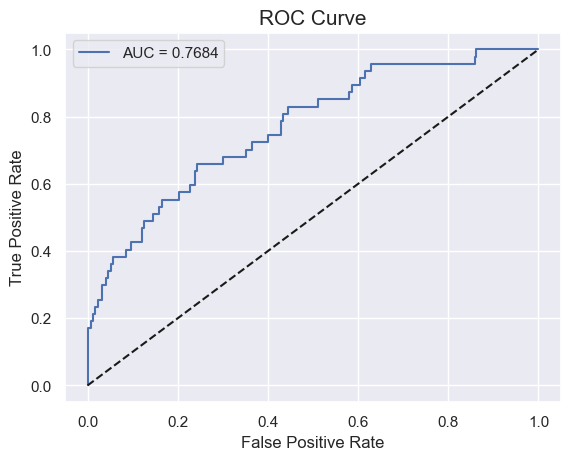

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [55]:
df1 = pd.read_csv('employee.csv')
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [58]:
df1.drop(columns=['EmployeeNumber', 'StandardHours', 'Over18', 'PerformanceRating'], inplace=True)


In [59]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df1[col].unique())

    # Transform the column using the encoder
    df1[col] = label_encoder.transform(df1[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df1[col].unique()}")

Attrition: [1 0]
BusinessTravel: [2 1 0]
Department: [2 1 0]
EducationField: [1 4 3 2 5 0]
Gender: [0 1]
JobRole: [7 6 2 4 0 3 8 5 1]
MaritalStatus: [2 1 0]
OverTime: [1 0]


In [60]:
X = df1.drop('MonthlyIncome', axis=1)
y = df1['MonthlyIncome']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Regressor 1: Linear/Polynomial Regression
linear_regressor = LinearRegression()
poly_regressor = LinearRegression()


polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Cross-validation Linear Regression
linear_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_rmse = np.sqrt(-linear_scores.mean())

# Cross-validation Polynomial Regression
poly_scores = cross_val_score(poly_regressor, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
poly_rmse = np.sqrt(-poly_scores.mean())

print("Linear Regression - Cross-validation RMSE:", linear_rmse)
print("Polynomial Regression - Cross-validation RMSE:", poly_rmse)

# Regressor 2: Decision Tree/Random Forest/XGBoost Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Hyperparameter grid for Decision Tree Regressor
dt_params = {
    'max_depth': [2, 4, 6, 8, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Hyperparameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for XGBoost Regressor
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Hyperparameter grid for Polynomial Regression
poly_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Hyperparameter grid for Linear Regression
linear_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# GridSearchCV for Decision Tree Regressor
dt_grid_search = GridSearchCV(dt_regressor, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)
print("Decision Tree Regressor - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Regressor - Best Cross-validation RMSE:", np.sqrt(-dt_grid_search.best_score_))

# GridSearchCV for Random Forest Regressor
rf_grid_search = GridSearchCV(rf_regressor, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
print("Random Forest Regressor - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Regressor - Best Cross-validation RMSE:", np.sqrt(-rf_grid_search.best_score_))

# GridSearchCV for XGBoost Regressor
xgb_grid_search = GridSearchCV(xgb_regressor, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
print("XGBoost Regressor - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Regressor - Best Cross-validation RMSE:", np.sqrt(-xgb_grid_search.best_score_))

# GridSearchCV for Polynomial Regression
poly_grid_search = GridSearchCV(poly_regressor, poly_params, cv=5, scoring='neg_mean_squared_error')
poly_grid_search.fit(X_train_poly, y_train)
print("Polynomial Regression - Best Parameters:", poly_grid_search.best_params_)
print("Polynomial Regression - Best Cross-validation RMSE:", np.sqrt(-poly_grid_search.best_score_))

# GridSearchCV for Linear Regression
linear_grid_search = GridSearchCV(linear_regressor, linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)
print("Linear Regression - Best Parameters:", linear_grid_search.best_params_)
print("Linear Regression - Best Cross-validation RMSE:", np.sqrt(-linear_grid_search.best_score_))


Linear Regression - Cross-validation RMSE: 1446.717735010558
Polynomial Regression - Cross-validation RMSE: 1915.870471038135


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

Decision Tree Regressor - Best Parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Regressor - Best Cross-validation RMSE: 1214.3940615186618
Random Forest Regressor - Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Regressor - Best Cross-validation RMSE: 1184.286013963757
XGBoost Regressor - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost Regressor - Best Cross-validation RMSE: 1125.815170024027


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
rf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

In [ ]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150)
xgb_regressor.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = xgb_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(xgb_regressor, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Train linear regression model
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = linreg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": np.abs(linreg.coef_)
})

# Sort by importance (absolute value of coefficients)
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features
fi2 = fi.head(10)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attribute (Linear Regression)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# Regressor 1: Linear Regression
linear_regressor = LinearRegression(fit_intercept=True)
linear_regressor.fit(X_train, y_train)

y_train_pred_linear = linear_regressor.predict(X_train)
y_test_pred_linear = linear_regressor.predict(X_test)

# Calculate metrics for Linear Regression
linear_r2_train = linear_regressor.score(X_train, y_train)
linear_r2_test = linear_regressor.score(X_test, y_test)
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear)
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)
linear_rmse_train = np.sqrt(linear_mse_train)
linear_rmse_test = np.sqrt(linear_mse_test)
linear_mae_train = mean_absolute_error(y_train, y_train_pred_linear)
linear_mae_test = mean_absolute_error(y_test, y_test_pred_linear)
linear_mape_train = MAPE(y_train, y_train_pred_linear)
linear_mape_test = MAPE(y_test, y_test_pred_linear)

# Regressor 2: Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dt_regressor.fit(X_train, y_train)

y_train_pred_dt = dt_regressor.predict(X_train)
y_test_pred_dt = dt_regressor.predict(X_test)

# Calculate metrics for Decision Tree Regressor
dt_r2_train = dt_regressor.score(X_train, y_train)
dt_r2_test = dt_regressor.score(X_test, y_test)
dt_mse_train = mean_squared_error(y_train, y_train_pred_dt)
dt_mse_test = mean_squared_error(y_test, y_test_pred_dt)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_rmse_test = np.sqrt(dt_mse_test)
dt_mae_train = mean_absolute_error(y_train, y_train_pred_dt)
dt_mae_test = mean_absolute_error(y_test, y_test_pred_dt)
dt_mape_train = MAPE(y_train, y_train_pred_dt)
dt_mape_test = MAPE(y_test, y_test_pred_dt)

# Regressor 3: Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
rf_regressor.fit(X_train, y_train)

y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Calculate metrics for Random Forest Regressor
rf_r2_train = rf_regressor.score(X_train, y_train)
rf_r2_test = rf_regressor.score(X_test, y_test)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_train = mean_absolute_error(y_train, y_train_pred_rf)
rf_mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rf_mape_train = MAPE(y_train, y_train_pred_rf)
rf_mape_test = MAPE(y_test, y_test_pred_rf)

# Regressor 4: XGBoost Regressor
xgb_regressor = XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150)
xgb_regressor.fit(X_train, y_train)

y_train_pred_xgb = xgb_regressor.predict(X_train)
y_test_pred_xgb = xgb_regressor.predict(X_test)

# Calculate metrics for XGBoost Regressor
xgb_r2_train = xgb_regressor.score(X_train, y_train)
xgb_r2_test = xgb_regressor.score(X_test, y_test)
xgb_mse_train = mean_squared_error(y_train, y_train_pred_xgb)
xgb_mse_test = mean_squared_error(y_test, y_test_pred_xgb)
xgb_rmse_train = np.sqrt(xgb_mse_train)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_mae_train = mean_absolute_error(y_train, y_train_pred_xgb)
xgb_mae_test = mean_absolute_error(y_test, y_test_pred_xgb)
xgb_mape_train = MAPE(y_train, y_train_pred_xgb)
xgb_mape_test = MAPE(y_test, y_test_pred_xgb)

# Create a dataframe to compare the performance of the regressors
metrics_data = {
    'Regressor': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor'],
    'R2 (Train)': [linear_r2_train, dt_r2_train, rf_r2_train, xgb_r2_train],
    'R2 (Test)': [linear_r2_test, dt_r2_test, rf_r2_test, xgb_r2_test],
    'MSE (Train)': [linear_mse_train, dt_mse_train, rf_mse_train, xgb_mse_train],
    'MSE (Test)': [linear_mse_test, dt_mse_test, rf_mse_test, xgb_mse_test],
    'RMSE (Train)': [linear_rmse_train, dt_rmse_train, rf_rmse_train, xgb_rmse_train],
    'RMSE (Test)': [linear_rmse_test, dt_rmse_test, rf_rmse_test, xgb_rmse_test],
    'MAE (Train)': [linear_mae_train, dt_mae_train, rf_mae_train, xgb_mae_train],
    'MAE (Test)': [linear_mae_test, dt_mae_test, rf_mae_test, xgb_mae_test],
    'MAPE (Train)': [linear_mape_train, dt_mape_train, rf_mape_train, xgb_mape_train],
    'MAPE (Test)': [linear_mape_test, dt_mape_test, rf_mape_test, xgb_mape_test]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

In [ ]:
import pandas as pd

# Read the CSV file into DataFrame
df2 = pd.read_csv('employee.csv')

# Print the column names and the first few rows of the DataFrame
print("Column Names:", df2.columns)
print(df2.head())

# Drop specified columns if they exist
columns_to_drop = ['EmployeeNumber', 'StandardHours', 'Over18', 'PerformanceRating']
df2.drop(columns=columns_to_drop, inplace=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

selected_columns = ['MonthlyIncome', 'Age', 'DailyRate']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10
find_optimal_k_elbow(X, max_k)

# Mencari nilai k optimal menggunakan Silhouette Score
find_optimal_k_silhouette(X, max_k)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmin(np.diff(inertias)) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmax(silhouette_scores) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans


selected_columns = ['MonthlyIncome', 'Age', 'DailyRate']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10
kmeans_model = find_optimal_k_elbow(X, max_k)

# Predict cluster labels and add 'label' column to the DataFrame
df2['label'] = kmeans_model.predict(X)

df2


NameError: name 'df2' is not defined

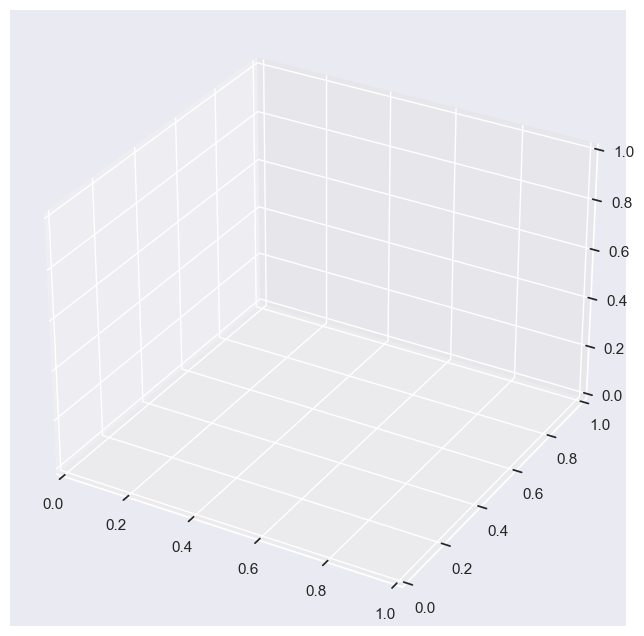

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap for the clusters
colors = plt.cm.tab10(df2['label'] / float(max(df2['label'])))

# Plot the data points
ax.scatter(df2['MonthlyIncome'], df2['Age'], df2['DailyRate'], c=colors, s=50)

# Set labels for the axes
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Age')
ax.set_zlabel('DailyRate')

# Set the title
ax.set_title('Employee Cluster')

plt.show()